In [ ]:
import pandas as pd
import pyodbc
import nltk
import matplotlib.pyplot as plt
import seaborn as sns

from nltk.sentiment import SentimentIntensityAnalyzer   



# Download the VADER lexicon for sentiment analysis
nltk.download('vader_lexicon')


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\aungt\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [3]:
# Define a function to connect to the SQL Server database and fetch data
def fetch_data_from_db(server, database, username, password, query):

    conn_str = (
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"UID={username};"
        f"PWD={password}"
    )

    conn = pyodbc.connect(conn_str)
    df = pd.read_sql_query(query, conn)
    conn.close()
    return df


In [4]:
# Set credentials 
server = "FrancisATK"   # your SQL Server name
database = "PortfolioProject_MarketingAnalytics"
username = "sa"
password = "AungThuKyaw@123"


In [5]:
# Write SQL query to fetch customer reviews

query = """
SELECT *
FROM customer_reviews
"""


In [6]:
# Fetch data from the database
df = fetch_data_from_db(server, database, username, password, query)
df.head(10)


C:\Users\aungt\AppData\Local\Temp\ipykernel_40224\2140253998.py:13: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql_query(query, conn)


,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText
0,1,77,18,2023-12-23,3,"Average experience, nothing special."
1,2,80,19,2024-12-25,5,The quality is top-notch.
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper."
4,5,64,2,2023-07-16,3,"Average experience, nothing special."
5,6,81,1,2025-12-21,4,Customer support was very helpful.
6,7,16,1,2024-01-29,3,"Average experience, nothing special."
7,8,55,8,2024-08-15,5,The quality is top-notch.
8,9,3,13,2023-09-01,4,"I love this product, will buy again!"
9,10,78,6,2024-06-17,5,"Excellent product, highly recommend!"


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   ReviewID    1363 non-null   int64 
 1   CustomerID  1363 non-null   int64 
 2   ProductID   1363 non-null   int64 
 3   ReviewDate  1363 non-null   object
 4   Rating      1363 non-null   int64 
 5   ReviewText  1363 non-null   object
dtypes: int64(4), object(2)
memory usage: 64.0+ KB


In [8]:
df.describe()

,ReviewID,CustomerID,ProductID,Rating
count,1363.00000,1363.000000,1363.000000,1363.000000
mean,682.00000,51.701394,10.337491,3.686720
std,393.60852,28.605493,5.702922,1.180243
min,1.00000,1.000000,1.000000,1.000000
25%,341.50000,27.000000,5.000000,3.000000
50%,682.00000,53.000000,10.000000,4.000000
75%,1022.50000,77.000000,15.000000,5.000000
max,1363.00000,100.000000,20.000000,5.000000


In [9]:
sia = SentimentIntensityAnalyzer()

df['sentiment_scores'] = df['ReviewText'].apply(lambda x: sia.polarity_scores(x))
df[['ReviewText', 'sentiment_scores']].head(10)

,ReviewText,sentiment_scores
0,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp..."
1,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
2,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp..."
4,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp..."
5,Customer support was very helpful.,"{'neg': 0.0, 'neu': 0.341, 'pos': 0.659, 'comp..."
6,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp..."
7,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound..."
8,"I love this product, will buy again!","{'neg': 0.0, 'neu': 0.527, 'pos': 0.473, 'comp..."
9,"Excellent product, highly recommend!","{'neg': 0.0, 'neu': 0.228, 'pos': 0.772, 'comp..."


In [10]:
# Extract compound sentiment scores
df["compound"] = df["sentiment_scores"].apply(lambda x: x["compound"])
df.head()


,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,sentiment_scores,compound
0,1,77,18,2023-12-23,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089
1,2,80,19,2024-12-25,5,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.2382
4,5,64,2,2023-07-16,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089


In [11]:
# Analyze the distribution of compound sentiment scores
df["compound"].value_counts().head(10)


compound
 0.0000    442
 0.2382    122
 0.6997    114
-0.1695    113
 0.8016    105
 0.6696     99
-0.3089     91
-0.2617     73
 0.5106     56
 0.7773     54
Name: count, dtype: int64

In [12]:
# sentiment labeling based on compound scores
def label_sentiment(compound):
    if compound >= 0.6:
        return "Very Positive"
    if compound <= -0.6:
        return "Very Negative"
    if compound >= 0.05:
        return "Positive"
    if compound <= -0.05:
        return "Negative"
    return "Neutral"

df["sentiment_label"] = df["compound"].apply(label_sentiment)
df.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,sentiment_scores,compound,sentiment_label
0,1,77,18,2023-12-23,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative
1,2,80,19,2024-12-25,5,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.2382,Positive
4,5,64,2,2023-07-16,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1363 entries, 0 to 1362
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ReviewID          1363 non-null   int64  
 1   CustomerID        1363 non-null   int64  
 2   ProductID         1363 non-null   int64  
 3   ReviewDate        1363 non-null   object 
 4   Rating            1363 non-null   int64  
 5   ReviewText        1363 non-null   object 
 6   sentiment_scores  1363 non-null   object 
 7   compound          1363 non-null   float64
 8   sentiment_label   1363 non-null   object 
dtypes: float64(1), int64(4), object(4)
memory usage: 96.0+ KB


In [14]:
df.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,sentiment_scores,compound,sentiment_label
0,1,77,18,2023-12-23,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative
1,2,80,19,2024-12-25,5,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.2382,Positive
4,5,64,2,2023-07-16,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative


In [15]:
# Sentiment distribution counts
df["sentiment_label"].value_counts()

sentiment_label
Neutral          442
Very Positive    408
Negative         326
Positive         178
Very Negative      9
Name: count, dtype: int64

In [16]:
# Sentiment distribution in percentage
df["sentiment_label"].value_counts(normalize=True) * 100


sentiment_label
Neutral          32.428467
Very Positive    29.933969
Negative         23.917828
Positive         13.059428
Very Negative     0.660308
Name: proportion, dtype: float64

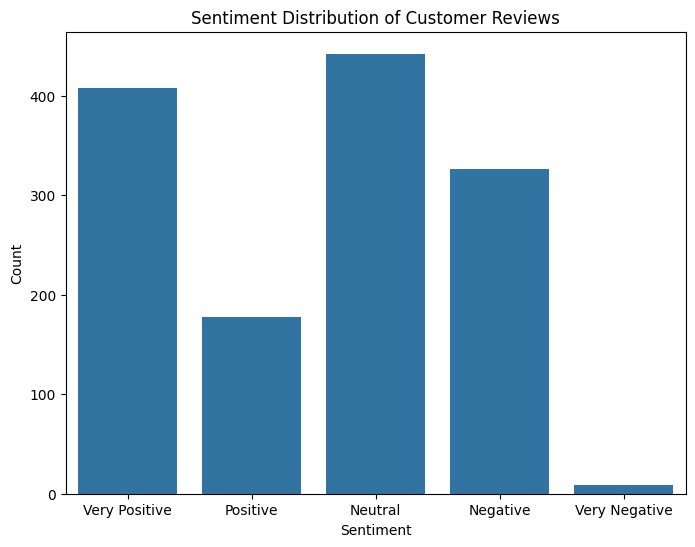

In [ ]:
# Visualize sentiment distribution
plt.figure(figsize=(8, 6))
sns.countplot(x="sentiment_label", data=df, order=["Very Positive", "Positive", "Neutral", "Negative", "Very Negative"])
plt.title("Sentiment Distribution of Customer Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()


### Intent Analysis

In [18]:
# Intent analysis on customer reviews

def detect_intent(text):
    text = text.lower()

    if any(word in text for word in ["refund", "return", "replace", "broken"]):
        return "Return/Refund Intent"
    if any(word in text for word in ["why", "how", "does it", "is it", "can i"]):
        return "Inquiry"
    if any(word in text for word in ["buying", "thinking of buying", "considering", "purchase"]):
        return "Purchase Intent"
    if any(word in text for word in ["bad", "terrible", "issue", "problem", "complaint"]):
        return "Complaint"
    if any(word in text for word in ["using", "use it for", "planning to use"]):
        return "Usage Intent"

    return "Product Feedback"


In [19]:
df["intent"] = df["ReviewText"].apply(detect_intent)
df.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,sentiment_scores,compound,sentiment_label,intent
0,1,77,18,2023-12-23,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative,Product Feedback
1,2,80,19,2024-12-25,5,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Product Feedback
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Product Feedback
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.2382,Positive,Product Feedback
4,5,64,2,2023-07-16,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative,Product Feedback


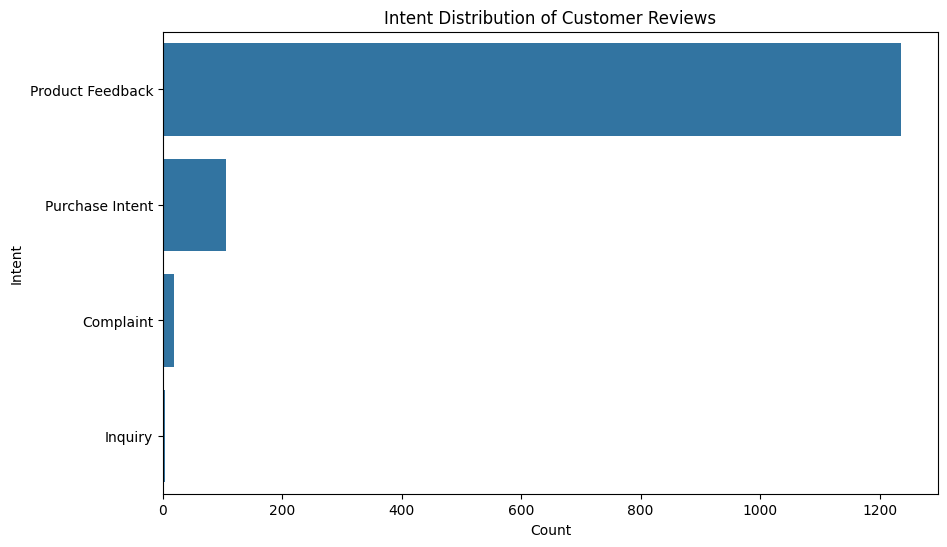

In [20]:
# visualize intent distribution
plt.figure(figsize=(10, 6))
sns.countplot(y="intent", data=df, order=df["intent"].value_counts().index)
plt.title("Intent Distribution of Customer Reviews")
plt.xlabel("Count")
plt.ylabel("Intent")
plt.show()


In [21]:
# export the analyzed data to a new SQL table
def export_data_to_db(server, database, username, password, table_name, df):
    conn_str = (
        f"DRIVER={{ODBC Driver 17 for SQL Server}};"
        f"SERVER={server};"
        f"DATABASE={database};"
        f"UID={username};"
        f"PWD={password}"
    )

    conn = pyodbc.connect(conn_str)
    cursor = conn.cursor()

    # Create table if not exists
    create_table_query = f"""
    IF NOT EXISTS (SELECT * FROM sysobjects WHERE name='{table_name}' AND xtype='U')
    CREATE TABLE {table_name} (
        ReviewID INT PRIMARY KEY,
        CustomerID INT,
        ProductID INT,
        ReviewDate DATETIME,
        ReviewText NVARCHAR(MAX),
        sentiment_label NVARCHAR(50),
        intent NVARCHAR(50)
    )
    """
    cursor.execute(create_table_query)
    conn.commit()

    # Insert data into the table
    for index, row in df.iterrows():
        insert_query = f"""
        INSERT INTO {table_name} (ReviewID, CustomerID, ProductID, ReviewDate, ReviewText, sentiment_label, intent)
        VALUES (?, ?, ?, ?, ?, ?, ?)
        """
        cursor.execute(insert_query, row.ReviewID, row.CustomerID, row.ProductID, row.ReviewDate, row.ReviewText, row.sentiment_label, row.intent)

    conn.commit()
    cursor.close()
    conn.close()
export_data_to_db(server, database, username, password, "customer_reviews_analysis3", df)

IntegrityError: ('23000', "[23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]Violation of PRIMARY KEY constraint 'PK__customer__74BC79AEFE58EBDA'. Cannot insert duplicate key in object 'dbo.customer_reviews_analysis3'. The duplicate key value is (1). (2627) (SQLExecDirectW); [23000] [Microsoft][ODBC Driver 17 for SQL Server][SQL Server]The statement has been terminated. (3621)")

In [22]:
df.head()

,ReviewID,CustomerID,ProductID,ReviewDate,Rating,ReviewText,sentiment_scores,compound,sentiment_label,intent
0,1,77,18,2023-12-23,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative,Product Feedback
1,2,80,19,2024-12-25,5,The quality is top-notch.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Product Feedback
2,3,50,13,2025-01-26,4,Five stars for the quick delivery.,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral,Product Feedback
3,4,78,15,2025-04-21,3,"Good quality, but could be cheaper.","{'neg': 0.0, 'neu': 0.719, 'pos': 0.281, 'comp...",0.2382,Positive,Product Feedback
4,5,64,2,2023-07-16,3,"Average experience, nothing special.","{'neg': 0.429, 'neu': 0.571, 'pos': 0.0, 'comp...",-0.3089,Negative,Product Feedback


C:\Users\aungt\AppData\Local\Temp\ipykernel_40224\117585135.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Rating", data=df, palette="viridis")


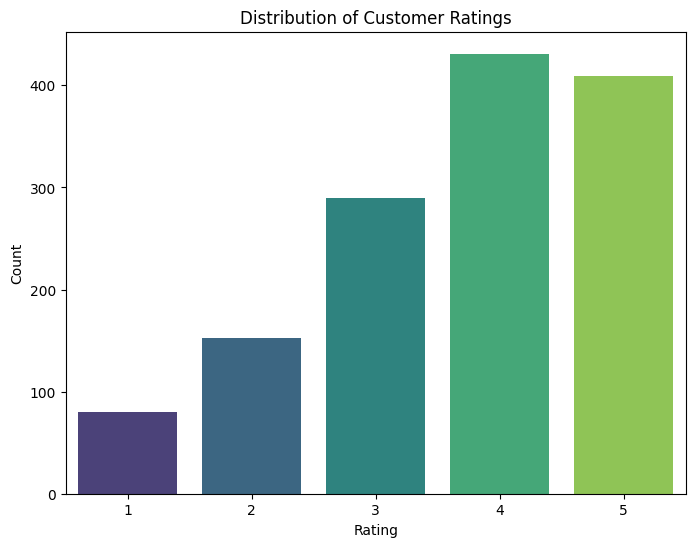

In [23]:
# distribution of rating
plt.figure(figsize=(8, 6))
sns.countplot(x="Rating", data=df, palette="viridis")   
plt.title("Distribution of Customer Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()


## Hypothesis Testing 

In [ ]:
import scipy.stats as stats
from scipy.stats import kruskal


# Split Ratings Into 5 Groups
very_negative = df[df['sentiment_label'] == 'Very Negative']['Rating']
negative = df[df['sentiment_label'] == 'Negative']['Rating']
neutral = df[df['sentiment_label'] == 'Neutral']['Rating']
positive = df[df['sentiment_label'] == 'Positive']['Rating']
very_positive = df[df['sentiment_label'] == 'Very Positive']['Rating']

# Perform Kruskal-Wallis H-test
statistic, p_value = kruskal(
    very_negative,   
    negative,
    neutral,
    positive, 
    very_positive
)
 
print(f"Kruskal-Wallis H-test statistic: {statistic}")
print(f"P-value: {p_value}")
# Since the p-value is less than 0.05, we reject the null hypothesis and conclude that there are significant differences in ratings across sentiment categories.

Kruskal-Wallis H-test statistic: 600.7346711578977
P-value: 1.0745330863602088e-128


Since the p-value is 1.07 e-128, sentiment and rating are strongly related. This result validates your entire sentiment analysis pipeline:
- The sentiment labels reflect real differences in user ratings
- The model is capturing meaningful emotional signals
- There is a measurable behavioural pattern in the data


In [33]:
import scikit_posthocs as sp

posthoc = sp.posthoc_dunn(
    df,
    val_col='Rating',
    group_col='sentiment_label',
    p_adjust='bonferroni'
)

posthoc


#### Post‑hoc Dunn tests revealed that “Very Positive” sentiment is associated with significantly higher ratings than all other sentiment categories. 
#### “Negative” and “Very Negative” reviews do not differ significantly, and “Neutral” and “Positive” reviews also show no significant difference. 
#### This suggests that extreme positive sentiment is the strongest predictor of high ratings, while moderate sentiment categories overlap in rating behaviour.

,Negative,Neutral,Positive,Very Negative,Very Positive
Negative,1.000000e+00,1.210315e-70,5.353972e-33,7.352171e-01,8.386295e-119
Neutral,1.210315e-70,1.000000e+00,5.018006e-01,1.372913e-07,7.812441e-09
Positive,5.353972e-33,5.018006e-01,1.000000e+00,3.662867e-06,3.249226e-10
Very Negative,7.352171e-01,1.372913e-07,3.662867e-06,1.000000e+00,4.369552e-11
Very Positive,8.386295e-119,7.812441e-09,3.249226e-10,4.369552e-11,1.000000e+00


The post‑hoc Dunn tests (with Bonferroni correction) show clear differences in rating behaviour across sentiment categories:
- “Very Positive” sentiment has significantly higher ratings than all other sentiment groups.
- “Negative” and “Very Negative” reviews do not differ significantly, indicating similar rating patterns.
- “Neutral” and “Positive” reviews also do not differ significantly, suggesting overlapping rating behaviour.
- Overall, the results indicate that extreme positive sentiment is the strongest predictor of higher ratings, while moderate sentiment categories (Neutral/Positive and Negative/Very Negative) show substantial overlap.

